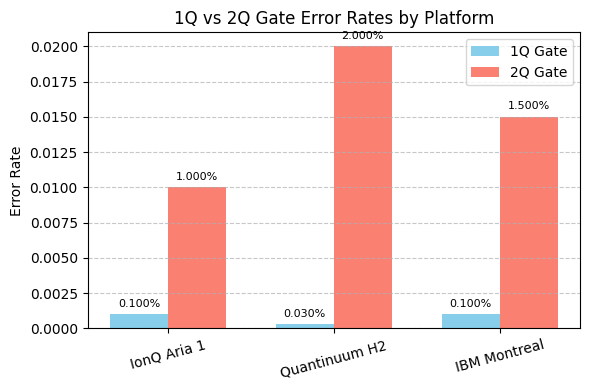

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Fidelity values
data = {
    "Platform": ["IonQ Aria 1", "Quantinuum H2", "IBM Montreal"],
    "1Q Gate Error Rate": [1 - 0.999, 1 - 0.9997, 1 - 0.999],
    "2Q Gate Error Rate": [1 - 0.99, 1 - 0.98, 1 - 0.985],
}

df = pd.DataFrame(data)

# Create grouped bar plot
x = range(len(df["Platform"]))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(6, 4))
bars1 = ax.bar([i - bar_width/2 for i in x], df["1Q Gate Error Rate"],
               bar_width, label="1Q Gate", color="skyblue")
bars2 = ax.bar([i + bar_width/2 for i in x], df["2Q Gate Error Rate"],
               bar_width, label="2Q Gate", color="salmon")

# Axes and Labels
ax.set_xticks(x)
ax.set_xticklabels(df["Platform"], rotation=15)
ax.set_ylabel("Error Rate")
ax.set_title("1Q vs 2Q Gate Error Rates by Platform")
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate bars with percentage labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3%}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig("fidelity_error_rates_plot.png", dpi=300)
plt.show()

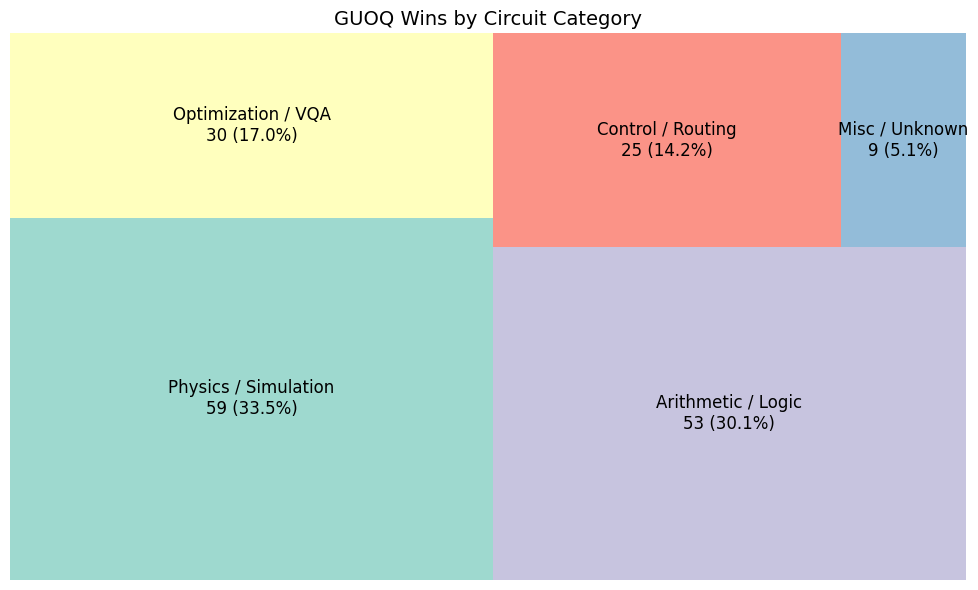

In [6]:
import matplotlib.pyplot as plt
import squarify
import matplotlib.cm as cm

# Raw data
raw_counts = {
    "TFIM": 39, "qaoa": 16, "xor5": 4, "qv": 4, "grover": 4, "graycode6": 4,
    "gf2^7": 4, "gf2^6": 4, "gf2^5": 4, "gf2^4": 4, "ex1": 4, "alu-v1": 4, "alu-v0": 4, "4mod5-v1": 4,
    "vqe": 3, "qft": 3, "ising": 3, "gf2^9": 3, "gf2^8": 3, "gf2^10": 3, "cnt3-5": 3,
    "alu-v4": 3, "XY": 3, "urf3": 2, "tof": 2, "sys6-v0": 2, "sym9": 2, "rd84": 2, "rd73": 2,
    "rd53": 2, "rd32-v0": 2, "one-two-three-v3": 2, "one-two-three-v2": 2, "mod": 2,
    "ham15-low:": 2, "decod24-v2": 2, "decod24-v0": 2, "csla": 2, "alu-v3": 2, "alu-v2": 2,
    "4mod5-v0": 2, "urf4": 1, "rd32-v1": 1, "qiskit-alu-v0": 1, "qiskit-3": 1, "qcla": 1,
    "mod10": 1, "mini": 1, "alu-bdd": 1, "aj-e11": 1, "3": 1
}

category_map = {
    "Physics / Simulation": ["TFIM", "ising", "XY", "vqe", "qft", "qv", "grover"],
    "Optimization / VQA": ["qaoa", "urf3", "urf4", "cnt3-5", "graycode6", "ex1"],
    "Arithmetic / Logic": [
        "gf2^4", "gf2^5", "gf2^6", "gf2^7", "gf2^8", "gf2^9", "gf2^10",
        "alu-v0", "alu-v1", "alu-v2", "alu-v3", "alu-v4", "alu-bdd",
        "mod", "mod10", "qcla", "csla", "mini", "one-two-three-v2", "one-two-three-v3", "aj-e11"
    ],
    "Control / Routing": [
        "rd32-v0", "rd32-v1", "rd53", "rd73", "rd84", "tof", "sys6-v0", "sym9",
        "decod24-v0", "decod24-v2", "ham15-low:", "xor5"
    ],
    "Misc / Unknown": ["qiskit-alu-v0", "qiskit-3", "4mod5-v0", "4mod5-v1", "3"]
}

# Compute totals
category_counts = {}
for category, families in category_map.items():
    category_counts[category] = sum(raw_counts.get(fam, 0) for fam in families)

total = sum(category_counts.values())

# Prepare labels with % info
labels = [
    f"{cat}\n{count} ({count / total:.1%})"
    for cat, count in category_counts.items()
]

colors = cm.Set3(range(len(category_counts)))  # nicer color palette

# Plot treemap
plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=category_counts.values(),
    label=labels,
    color=colors,
    alpha=0.85,
    text_kwargs={'fontsize': 12}
)
plt.axis('off')
plt.title("GUOQ Wins by Circuit Category", fontsize=14)
plt.tight_layout()
plt.savefig("guoq_win_categories.png", dpi=300)
plt.show()

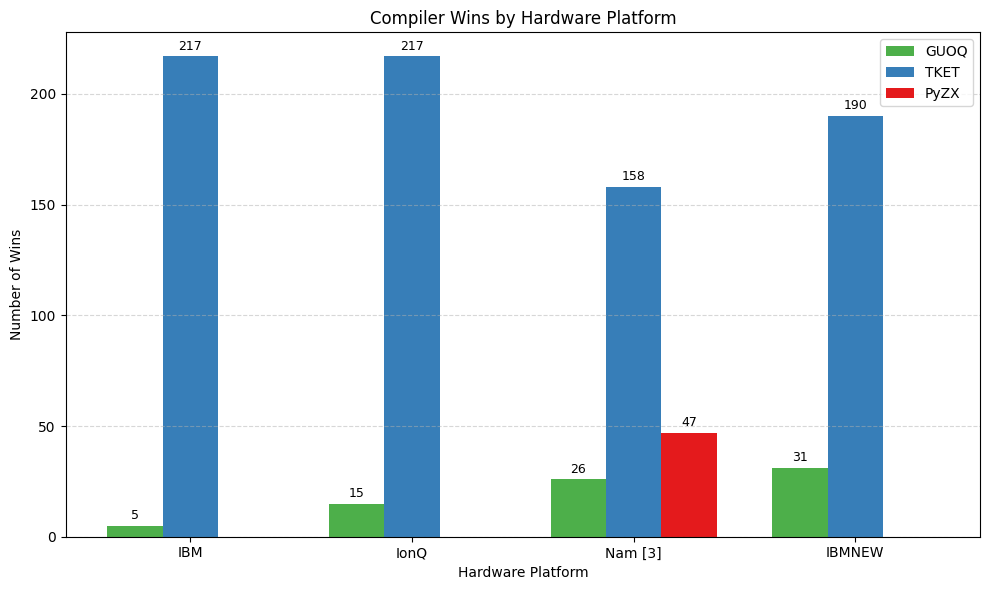

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# New data (4 hardware platforms)
hardware = ['IBM', 'IonQ', 'Nam [3]', 'IBMNEW']
guoq_wins = [5, 15, 26, 31]
tket_wins = [217, 217, 158, 190]
pyzx_wins = [0, 0, 47, 0]

x = np.arange(len(hardware))
bar_width = 0.25

plt.figure(figsize=(10, 6))

# Bars for each compiler
plt.bar(x - bar_width, guoq_wins, bar_width, label='GUOQ', color='#4daf4a')
plt.bar(x, tket_wins, bar_width, label='TKET', color='#377eb8')
plt.bar(x + bar_width, pyzx_wins, bar_width, label='PyZX', color='#e41a1c')

# Labels and layout
plt.xlabel('Hardware Platform')
plt.ylabel('Number of Wins')
plt.title('Compiler Wins by Hardware Platform')
plt.xticks(x, hardware)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate bars
for i in range(len(hardware)):
    plt.text(x[i] - bar_width, guoq_wins[i] + 3, str(guoq_wins[i]), ha='center', fontsize=9)
    plt.text(x[i], tket_wins[i] + 3, str(tket_wins[i]), ha='center', fontsize=9)
    if pyzx_wins[i] > 0:
        plt.text(x[i] + bar_width, pyzx_wins[i] + 3, str(pyzx_wins[i]), ha='center', fontsize=9)

plt.tight_layout()
plt.savefig("guoq_compiler_wins_by_hw.png", dpi=300)
plt.show()